# PJM Hourly Energy Consumption Case

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

### "Splitting the Data" Step - By Sabrina Otoni da Silva - 2024/04

In [1]:
from pathlib import Path 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [2]:
datapath = Path('../data/d02_intermediate')

In [3]:
df = pd.read_csv(f'{datapath}/pjme_n01.csv')
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [4]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)

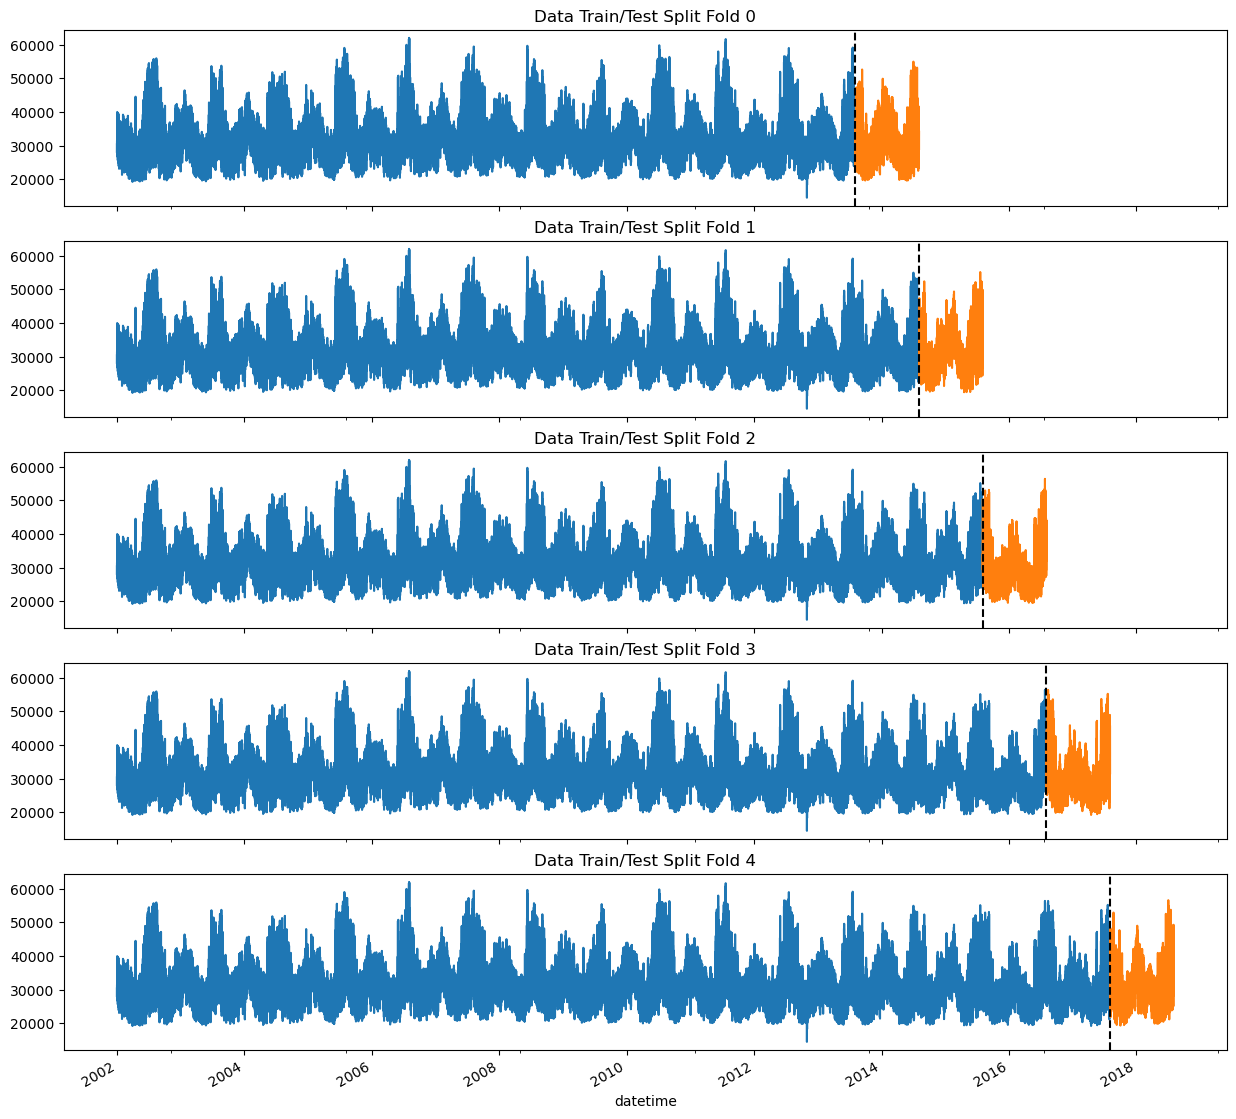

In [5]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15),
                       sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train['pjme_mw'].plot(ax=axs[fold], title=f'Data Train/Test Split Fold {fold}')
    test['pjme_mw'].plot(ax=axs[fold])
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1